In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
folder = "timeResultsFinal/"
csv256 = folder+"256_results.csv"
csv512 = folder+"512_results.csv"
csv1024 = folder+"1024_results.csv"
csv2048 = folder+"2048_results.csv"
csv4096 = folder+"4096_results.csv"
csv8192 = folder+"8192_results.csv"

In [16]:
results256 = np.loadtxt(csv256, delimiter=',')
results512 = np.loadtxt(csv512, delimiter=',')
results1024 = np.loadtxt(csv1024, delimiter=',')
results2048 = np.loadtxt(csv2048, delimiter=',')
results4096 = np.loadtxt(csv4096, delimiter=',')
results8192 = np.loadtxt(csv8192, delimiter=',')

In [17]:
avg256 = np.average(results256, axis=1).reshape(3,1)
avg512 = np.average(results512, axis=1).reshape(3,1)
avg1024 = np.average(results1024, axis=1).reshape(3,1)
avg2048 = np.average(results2048, axis=1).reshape(3,1)
avg4096 = np.average(results4096, axis=1).reshape(3,1)
avg8192 = np.average(results8192, axis=1).reshape(3,1)

avg256

array([[1259.2898804],
       [  90.4289856],
       [ 102.94067  ]])

In [18]:
results = np.concatenate((avg256, avg512, avg1024, avg2048, avg4096, avg8192), axis=1)
results

array([[1.25928988e+03, 5.01521343e+03, 2.00187506e+04, 8.00677820e+04,
        3.21945069e+05, 1.28655654e+06],
       [9.04289856e+01, 2.93649826e+02, 1.14754122e+03, 2.26353352e+03,
        4.54354370e+03, 9.06970811e+03],
       [1.02940670e+02, 4.66668542e+02, 1.31644635e+03, 2.43696389e+03,
        4.69460410e+03, 9.22948916e+03]])

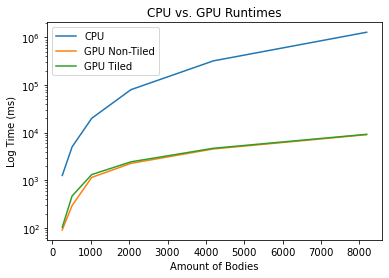

In [19]:
sizes = [256, 512, 1024, 2048, 4196, 8192]

plt.plot(sizes,results[0, :], label='CPU')
plt.plot(sizes, results[1, :], label='GPU Non-Tiled')
plt.plot(sizes, results[2, :], label='GPU Tiled')
plt.yscale('log')
plt.title("CPU vs. GPU Runtimes")
plt.ylabel('Log Time (ms)')
plt.xlabel('Amount of Bodies')
plt.legend()
plt.show()

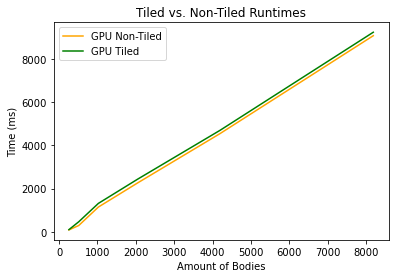

In [7]:
plt.plot(sizes, results[1, :], label='GPU Non-Tiled', color="orange")
plt.plot(sizes, results[2, :], label='GPU Tiled', color="green")
#plt.yscale('log')
plt.title("Tiled vs. Non-Tiled Runtimes")
plt.ylabel('Time (ms)')
plt.xlabel('Amount of Bodies')
plt.legend()
plt.show()

In [8]:
tiled_speedups = results[0,:]/results[2,:]
nontiled_speedups = results[0,:]/results[1,:]
tiled_speedups

array([ 12.23316188,  10.74684272,  15.20665888,  32.85554715,
        68.57768233, 139.39628891])

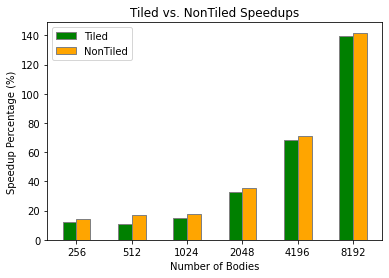

In [9]:
barWidth = 0.25

br1 = np.arange(len(tiled_speedups))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.bar(br1, tiled_speedups, color ='green', width = barWidth,
        edgecolor ='grey', label ='Tiled')
plt.bar(br2, nontiled_speedups, color ='orange', width = barWidth,
        edgecolor ='grey', label ='NonTiled')
plt.xticks([r + barWidth/2 for r in range(len(tiled_speedups))],
        sizes)
plt.ylabel("Speedup Percentage (%)")
plt.title("Tiled vs. NonTiled Speedups")
plt.xlabel("Number of Bodies")
plt.legend()
plt.show()

In [20]:
folder = "./divResults"
div256 = np.loadtxt(folder+"/256_results.csv", delimiter=',')
div512 = np.loadtxt(folder+"/512_results.csv", delimiter=',')
div1024 = np.loadtxt(folder+"/1024_results.csv", delimiter=',')
div2048 = np.loadtxt(folder+"/2048_results.csv", delimiter=',')
div4096 = np.loadtxt(folder+"/4096_results.csv", delimiter=',')
div8192 = np.loadtxt(folder+"/8192_results.csv", delimiter=',')

In [21]:
avg256 = np.average(div256)
avg512 = np.average(div512)
avg1024 = np.average(div1024)
avg2048 = np.average(div2048)
avg4096 = np.average(div4096)
avg8192 = np.average(div8192)

avg8192

5740.0024416

In [22]:
div = np.array([avg256, avg512, avg1024, avg2048, avg4096, avg8192])

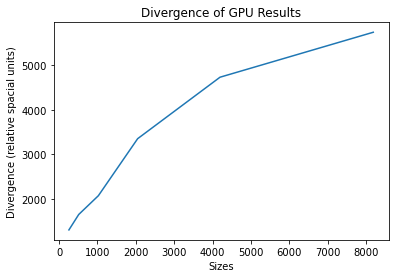

In [26]:
plt.plot(sizes, div)
plt.title("Divergence of GPU Results")
plt.xlabel("Sizes")
plt.ylabel("Divergence (relative spacial units)")
plt.show()